In [20]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import statistics
import pandas
#import necessary packages

In [2]:
def cost_function(item, list_object):
    sample_sum = 0
    for element in list_object:
        sample_sum = sample_sum + ((item - element)**2)/(len(list_object))
    sample_sum = math.sqrt(sample_sum)
    return sample_sum

In [8]:
#we write a cost function, J(theta), so we may determine the average error between the mean of a Globe cluster and the
#observations pulled from a cube of Ice data --> the size of the cube should end up being 90 km x 90 km
#the lat, long center for the Ice data cube and the Globe data cluster should be the same point ~approximately

In [9]:
ice_data = pandas.read_csv('elev_1.csv') #we use a CSV file of sample data for proof of concept

In [5]:
ice_data #pre-edited data

,segment_id_beg,segment_id_end,longitude,latitude,h_te_best_fit,h_te_uncertainty,h_canopy,h_canopy_uncertainty,track_id,beam,file_name
0,290744,290748,-172.978104,52.348576,4.502014,1.139743,18.417217,2.229614,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
1,290749,290753,-172.978241,52.349472,1.471275,0.513425,20.925179,1.637308,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
2,290754,290758,-172.978394,52.350368,7.502245,0.544397,14.111107,1.585246,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
3,290759,290763,-172.978546,52.351261,7.733732,0.408622,18.597122,1.023427,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
4,290764,290768,-172.978683,52.352158,5.962693,1.584672,15.630245,1.479247,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
...,...,...,...,...,...,...,...,...,...,...,...
212241,2003982,2003986,169.323807,-0.578724,36.595955,0.356853,NaN,NaN,130,gt1l,processed_ATL08_20200404022923_01300714_003_01.h5
212242,2003987,2003991,169.323715,-0.577821,36.000107,0.294612,NaN,NaN,130,gt1l,processed_ATL08_20200404022923_01300714_003_01.h5
212243,2003992,2003996,169.323624,-0.576919,36.433630,0.341587,NaN,NaN,130,gt1l,processed_ATL08_20200404022923_01300714_003_01.h5
212244,2003997,2004001,169.323547,-0.576016,35.889473,0.351560,NaN,NaN,130,gt1l,processed_ATL08_20200404022923_01300714_003_01.h5


In [10]:
ice_data = ice_data[ice_data['h_canopy']> 0] #we do not want any None values for tree height included

In [7]:
ice_data #post-edited data

,segment_id_beg,segment_id_end,longitude,latitude,h_te_best_fit,h_te_uncertainty,h_canopy,h_canopy_uncertainty,track_id,beam,file_name
0,290744,290748,-172.978104,52.348576,4.502014,1.139743,18.417217,2.229614,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
1,290749,290753,-172.978241,52.349472,1.471275,0.513425,20.925179,1.637308,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
2,290754,290758,-172.978394,52.350368,7.502245,0.544397,14.111107,1.585246,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
3,290759,290763,-172.978546,52.351261,7.733732,0.408622,18.597122,1.023427,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
4,290764,290768,-172.978683,52.352158,5.962693,1.584672,15.630245,1.479247,130,gt3r,processed_ATL08_20200404010910_01300702_003_01.h5
...,...,...,...,...,...,...,...,...,...,...,...
211564,2003644,2003648,169.330399,-0.639653,19.499273,NaN,43.147210,NaN,130,gt1r,processed_ATL08_20200404022923_01300714_003_01.h5
211565,2003649,2003651,169.330322,-0.638749,22.489426,NaN,38.992638,NaN,130,gt1r,processed_ATL08_20200404022923_01300714_003_01.h5
211566,2003695,2003699,169.329544,-0.630445,10.447918,NaN,46.605175,NaN,130,gt1r,processed_ATL08_20200404022923_01300714_003_01.h5
211567,2003701,2003704,169.329453,-0.629361,15.458924,NaN,44.837128,NaN,130,gt1r,processed_ATL08_20200404022923_01300714_003_01.h5


In [11]:
ice_segment = ice_data[ice_data['latitude'] > 36]

In [12]:
ice_segment = ice_segment[ice_segment['latitude'] < 40]

In [13]:
ice_segment.sort_values(by = 'latitude')

,segment_id_beg,segment_id_end,longitude,latitude,h_te_best_fit,h_te_uncertainty,h_canopy,h_canopy_uncertainty,track_id,beam,file_name
54043,798573,798577,5.028290,36.633396,613.985050,26.909111,9.423950,18.903818,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
54042,798568,798572,5.028398,36.634296,606.298160,9.618637,4.944763,9.116385,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
54041,798563,798567,5.028508,36.635197,640.759600,16.264473,5.619934,8.737176,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
54040,798558,798562,5.028612,36.636093,628.668600,5.301216,5.677063,4.579609,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
54039,798553,798557,5.028717,36.636993,601.415100,7.970351,5.344299,7.294723,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
...,...,...,...,...,...,...,...,...,...,...,...
53977,797875,797879,5.043192,36.758915,88.387596,0.365439,18.281510,0.352817,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
53976,797870,797874,5.043303,36.759811,108.999540,1.138490,11.220581,0.695925,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
53973,797768,797772,5.045497,36.778152,131.465820,NaN,17.380615,NaN,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5
53971,797758,797762,5.045716,36.779949,106.475640,NaN,65.842790,NaN,130,gt3r,processed_ATL08_20200404013340_01300706_003_01.h5


In [14]:
#for proof of concept, we choose a slice of data between 36-40 degrees latitude, with no longitudal bounds
# we will make the cube of observation much smaller, once we delve into the actual data files --> this is simply
#a demonstration

In [15]:
ice_height = ice_segment['h_canopy'].values.tolist()

In [16]:
#ice_height creates a list of tree height canopies that fall within the given latitudal constraint function

In [23]:
dummy_list = []
for i in range(len(ice_height)):
    dummy_list.append(i)
print(dummy_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]


In [22]:
#create a sample list so we can plot the ice_height data

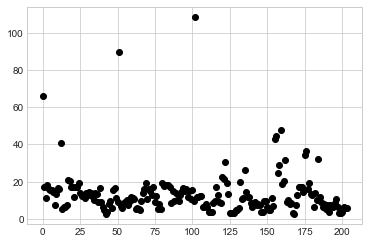

In [24]:
plt.plot(dummy_list, ice_height, 'o', color='black');

In [25]:
#as we can observe via the scatter plot, there are several outliers in the data set
#we will need to write a function to get rid of the outliers, so our error function will best reflect
#the central tendencies and differences between the two data sets

In [27]:
def outlier(sample_list):
    mean = statistics.mean(sample_list)
    stdev = statistics.stdev(sample_list)
    max_outlier = mean + 3*stdev
    min_outlier = mean - 3*stdev
    while max(sample_list) > max_outlier:
        sample_list.remove(max(sample_list))
    while min(sample_list) < min_outlier:
        sample_list.remove(min(sample_list))
    return sample_list

In [28]:
#the above function does the following:
#given a list as input, while the max or min values of the list exceed 3 standard deviations from the mean,
#remove the max value --> this will ensure a cost function error product which is less impacted by 
#outliers in the ICE data set

In [31]:
ice_height = outlier(ice_height)

In [33]:
#let's pick a sample few sample means from the cluster data collected previously:
mean_list = [10,13,15,16]


In [34]:
for item in mean_list:
    print(cost_function(item, ice_height))

6.126972092730667
6.10324210710648
6.859743606471674
7.41345677877835


In [35]:
#Based on these cluster sample, it seems the general error is around ~6 meters. Once we nail down much better / 
#more comprehensive ice data, this error product should reduce further. However, not a bad initial error